In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
sce = readRDS('./Mic.rds')

In [4]:
ifnb.list <- SplitObject(sce, split.by = "Condition")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 10, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:10)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.1)
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:10)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:10)
immune.combined = testAB.integrated

Computing 2000 integration features

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

No variable features found for object2 in the object.list. Running FindVariableFeatures ...

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4443 anchors

Filtering anchors

	Retained 2913 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3744
Number of edges: 126180

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9434
Number of communities: 7
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
08:24:28 UMAP embedding parameters a = 0.9922 b = 1.112

08:24:28 Read 3744 rows and found 10 numeric columns

08:24:28 Using Annoy for neighbor search, n_neighbors = 30

08:24:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:24:29 Writing NN index file to temp file /tmp/RtmpJKsSht/file3d228669aaab2

08:24:29 Searching Annoy index using 1 thread, search_k = 3000

08:24:30 Annoy recall = 100%

08:24:30 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

### https://www.hanspub.org/journal/PaperInformation?paperID=82245  小胶质细胞发文

In [43]:
options(repr.plot.width =5 ,repr.plot.height = 5)

In [44]:
immune.combined$celltype = paste0('Mic',immune.combined$seurat_clusters)

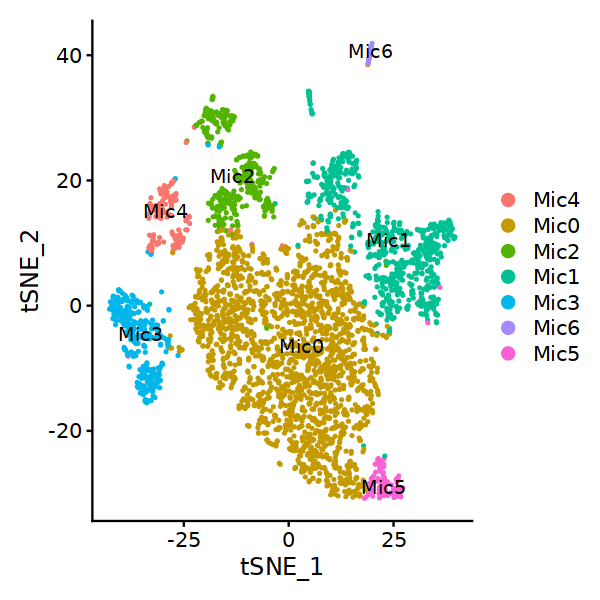

In [45]:
DimPlot(immune.combined,reduction  = 'tsne',label = T)

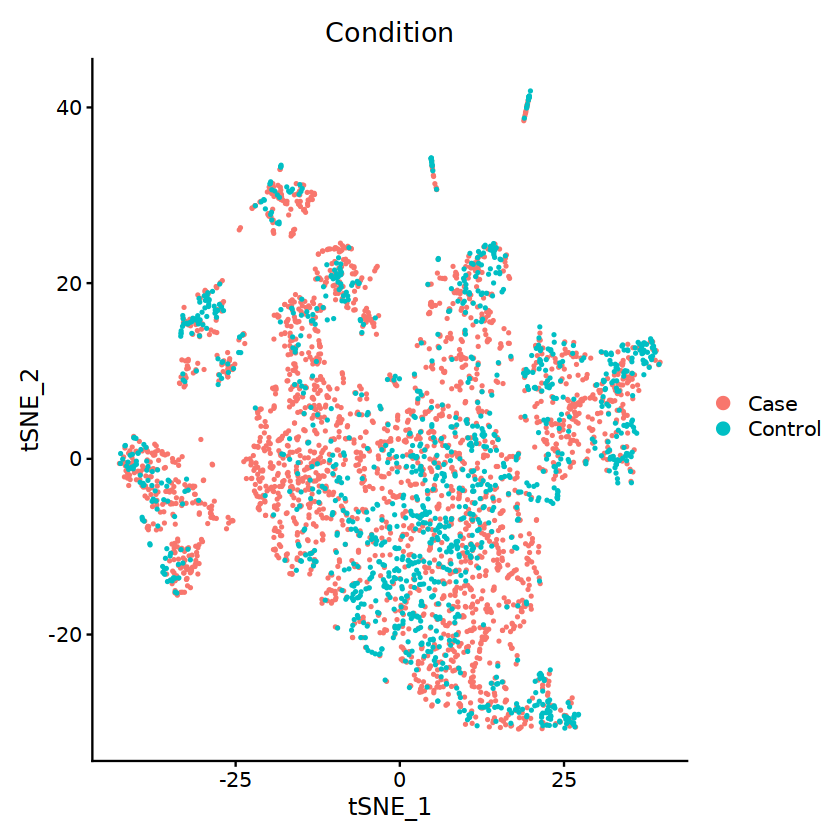

In [7]:
DimPlot(immune.combined,reduction  = 'tsne',group.by = 'Condition')

In [46]:
Idents(immune.combined) = 'seurat_clusters'

In [47]:
immune.combined2 = subset(immune.combined,idents = c(0,1,2,3,4,5))


   Case Control 
   2449    1261 


      Mic4       Mic0       Mic2       Mic1       Mic3       Mic5 
0.04555256 0.54770889 0.09541779 0.19245283 0.08787062 0.03099730 

      
       Case Control
  Mic4   99      70
  Mic0 1389     643
  Mic2  261      93
  Mic1  412     302
  Mic3  243      83
  Mic5   45      70

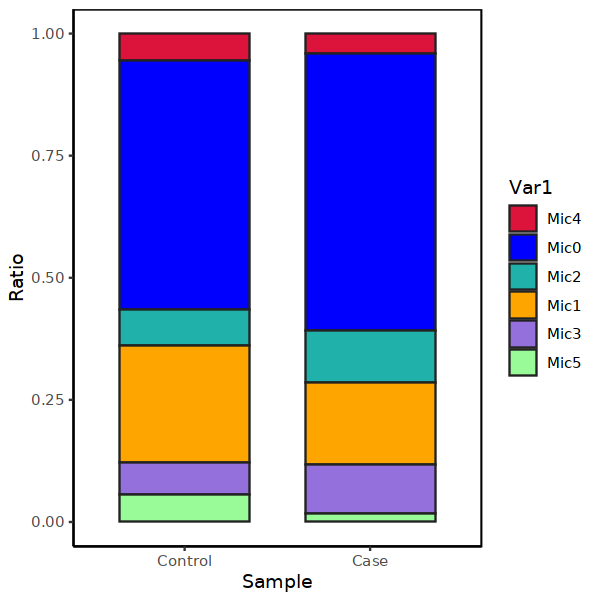

In [48]:
scRNA = immune.combined2
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$Condition)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$Condition)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$Condition), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('Control','Case'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

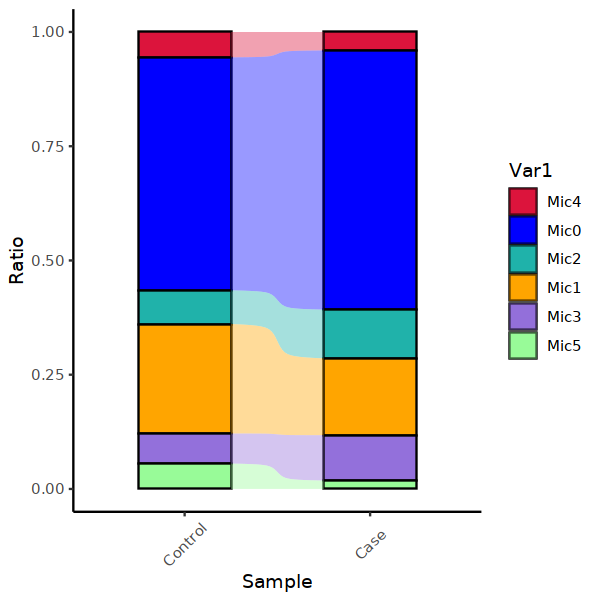

In [49]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [50]:
library(monocle)

In [51]:
immune.combined$celltype = paste0('Mic',immune.combined$seurat_clusters)

In [52]:
Idents(immune.combined) = 'celltype'

In [53]:
saveRDS(immune.combined2,file = 'rename.mic.rds')

In [54]:
bb = immune.combined2

In [55]:
library(dplyr)
library(RColorBrewer)
Idents(bb) = 'celltype'
DefaultAssay(bb) ='RNA'
data <- as(as.matrix(bb@assays$RNA@counts), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = bb@meta.data)
fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))
fd <- new('AnnotatedDataFrame', data = fData)
#Construct monocle cds
monocds <- newCellDataSet(data,
                              phenoData = pd,
                              featureData = fd,
                              lowerDetectionLimit = 0.5,
                              expressionFamily = negbinomial.size())

print("format data done , filter select genes ")
#pData(monocds)$Cluster<-as.factor(pData(monocds)$celltype) 
pData(monocds)['Cluster']=bb@active.ident	
monocds <- estimateSizeFactors(monocds)
monocds <- estimateDispersions(monocds)

[1] "format data done , filter select genes "


Removing 392 outliers



In [70]:
cds = monocds

In [71]:
DefaultAssay(immune.combined2) = 'RNA'
Idents(immune.combined2) = 'seurat_clusters'
deg.cluster <- FindAllMarkers(immune.combined2)
diff.genes <- subset(deg.cluster,p_val_adj<0.05)$gene
cds <- setOrderingFilter(cds, diff.genes)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [72]:
# diff_test_res <- differentialGeneTest(cds, fullModelFormulaStr = "~percent.mt")
# ordering_genes <- row.names (subset(diff_test_res, qval < 0.01))
# cds <- setOrderingFilter(cds, ordering_genes)

In [73]:
# disp_table <- dispersionTable(cds)
# disp.genes <- subset(disp_table, mean_expression >= 0.1 & dispersion_empirical >= 1 * dispersion_fit)$gene_id
# cds <- setOrderingFilter(cds, disp.genes)

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


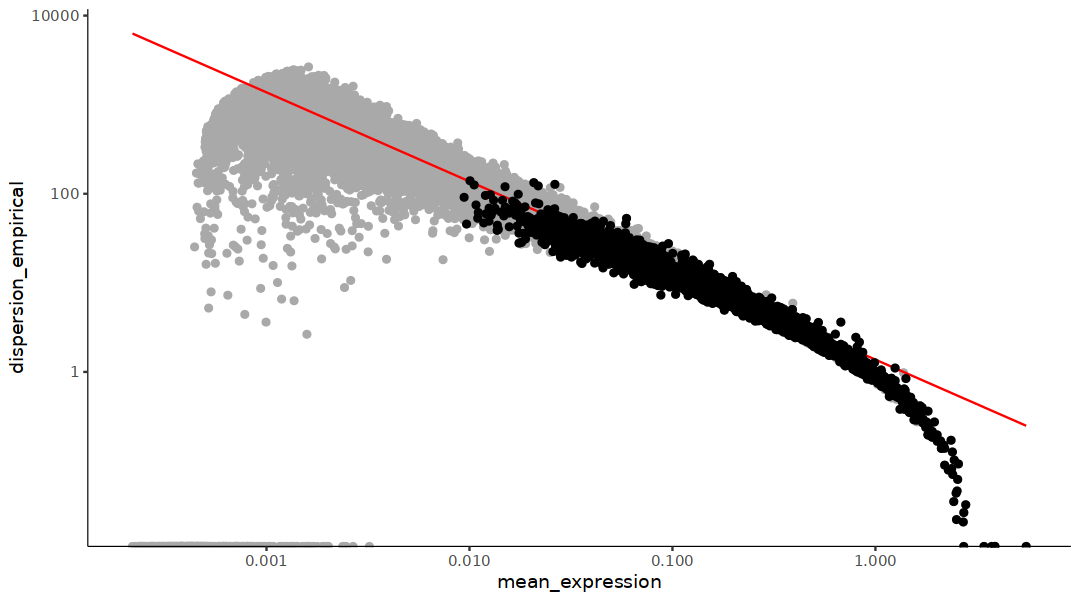

In [74]:
plot_ordering_genes(cds) 

In [75]:
cds <- reduceDimension(cds, max_components = 2,
                       method = 'DDRTree')
cds <- orderCells(cds)

Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
"Argument `neimode' is deprecated; use `mode' instead"
Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
"Argument `neimode' is deprecated; use `mode' instead"


In [76]:
options(repr.plot.width = 9)

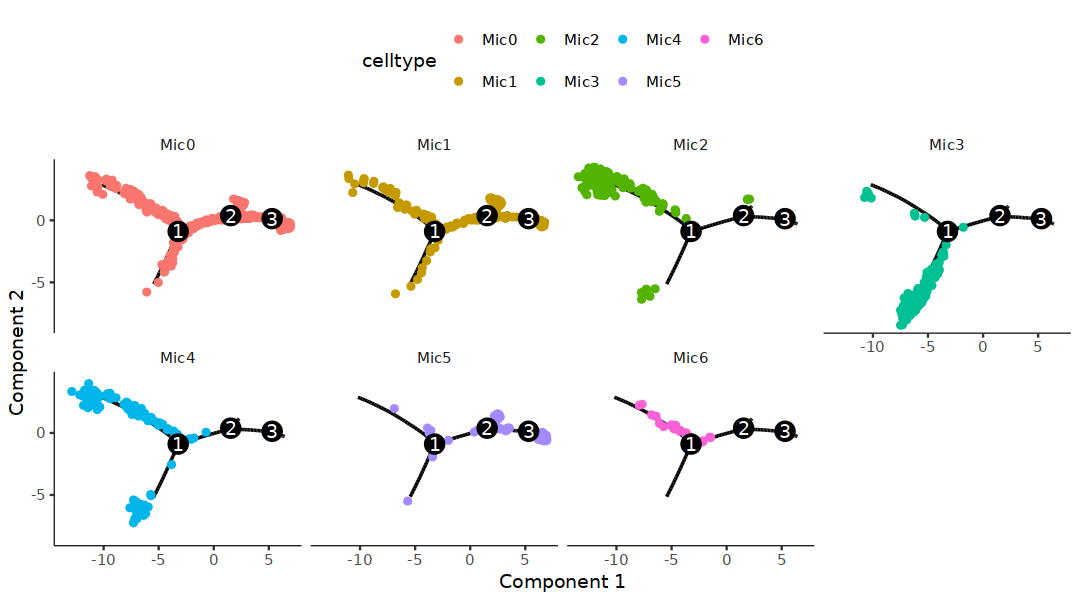

In [77]:
plot_cell_trajectory(cds, color_by = "celltype")  +
    facet_wrap(~celltype, nrow = 2)

In [78]:
library(CytoTRACE)

Welcome to the CytoTRACE R package, a tool for the unbiased prediction of differentiation states in scRNA-seq data. For more information about this method, visit https://cytotrace.stanford.edu.


Warning message:
"The ScanoramaCT python module is not accessible. The iCytoTRACE function for integration across multiple datasets will be disabled. Please follow the instructions in https://github.com/gunsagargulati/CytoTRACE to install the necessary Python packages for this application."


The number of cells in your dataset exceeds 3,000. CytoTRACE will now be run in fast mode (see documentation). You can multi-thread this run using the 'ncores' flag. To disable fast mode, please indicate 'enableFast = FALSE'.

Warning message in CytoTRACE(marrow_10x_expr, ncores = 8, subsamplesize = 1000):
"7550 genes have zero expression in the matrix and were filtered"
CytoTRACE will be run on 4 sub-sample(s) of approximately 928 cells each using 4 / 8 core(s)

Pre-processing data and generating similarity matrix...

Calculating gene counts signature...

Smoothing values with NNLS regression and diffusion...

Calculating genes associated with CytoTRACE...

Done



[1] 8

Running t-SNE. To use your own coordinates, use the 'emb' flag.



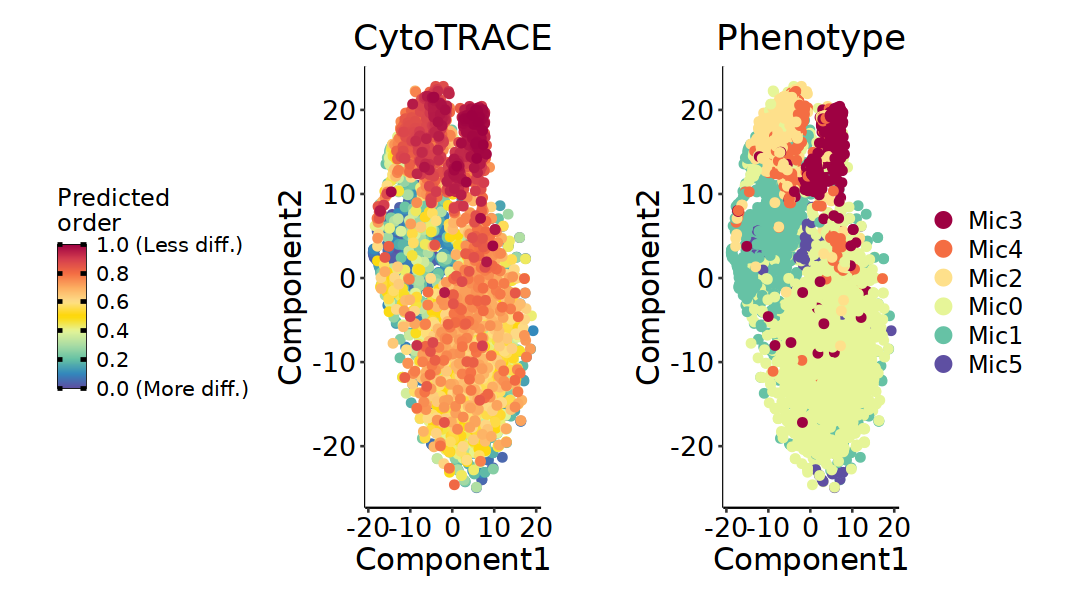

In [79]:
marrow_10x_expr  = as.matrix(immune.combined2@assays$RNA@counts)
marrow_10x_pheno <- immune.combined2$celltype
marrow_10x_pheno = as.character(marrow_10x_pheno)
names(marrow_10x_pheno) <- rownames(immune.combined2@meta.data)

results = CytoTRACE(marrow_10x_expr, 
	ncores = 8, subsamplesize = 1000)
length(results)  # 8

plotCytoTRACE(
	cyto_obj = results, 
	phenotype = marrow_10x_pheno, #细胞类型注释
	# gene = "Kit",  #是否映射特定基因表达
	emb = NULL,      #是否提供细胞降维坐标
	outputDir = "./" #图片储存路径
)

In [80]:
saveRDS(immune.combined2,file = 'remove.mic6.rds')